In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import datetime 
import pandas as pd
import netCDF4
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.ticker import FormatStrFormatter
from statistics import mean
from statistics import median

### Visualize EuRoC dataset

In [7]:
mh_01_data = pd.read_csv('/home/maciek/dev/projects_cpp/VisualSlam/EuRoC_MAV_dataset/mh_01_easy/state_groundtruth_estimate0/data.csv', delimiter = ",", header=0)
mh_03_data = pd.read_csv('/home/maciek/dev/projects_cpp/VisualSlam/EuRoC_MAV_dataset/mh_03_medium/state_groundtruth_estimate0/data.csv', delimiter = ",", header=0)
v1_01_data = pd.read_csv('/home/maciek/dev/projects_cpp/VisualSlam/EuRoC_MAV_dataset/v1_01_easy/state_groundtruth_estimate0/data.csv', delimiter = ",", header=0)
v1_02_data = pd.read_csv('/home/maciek/dev/projects_cpp/VisualSlam/EuRoC_MAV_dataset/v1_02_medium/state_groundtruth_estimate0/data.csv', delimiter = ",", header=0)
mh_01_data

,#timestamp,p_RS_R_x [m],p_RS_R_y [m],p_RS_R_z [m],q_RS_w [],q_RS_x [],q_RS_y [],q_RS_z [],v_RS_R_x [m s^-1],v_RS_R_y [m s^-1],v_RS_R_z [m s^-1],b_w_RS_S_x [rad s^-1],b_w_RS_S_y [rad s^-1],b_w_RS_S_z [rad s^-1],b_a_RS_S_x [m s^-2],b_a_RS_S_y [m s^-2],b_a_RS_S_z [m s^-2]
0,1403636580838555648,4.688319,-1.786938,0.783338,0.534108,-0.153029,-0.827383,-0.082152,-0.027876,0.033207,0.800006,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
1,1403636580843555328,4.688177,-1.786770,0.787350,0.534640,-0.152990,-0.826976,-0.082863,-0.029272,0.033992,0.804771,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
2,1403636580848555520,4.688028,-1.786598,0.791382,0.535178,-0.152945,-0.826562,-0.083605,-0.030043,0.034999,0.808240,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
3,1403636580853555456,4.687878,-1.786421,0.795429,0.535715,-0.152884,-0.826146,-0.084391,-0.030230,0.035853,0.810462,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
4,1403636580858555648,4.687727,-1.786240,0.799484,0.536244,-0.152821,-0.825731,-0.085213,-0.029905,0.036316,0.811406,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36377,1403636762723555584,4.575397,-1.940927,0.625653,0.579374,-0.042467,-0.813699,0.020497,-0.144929,-0.057693,-0.293219,-0.003238,0.021339,0.078290,-0.025497,0.136267,0.076404
36378,1403636762728555520,4.574676,-1.941212,0.624175,0.579591,-0.042072,-0.813579,0.019925,-0.143544,-0.056428,-0.297881,-0.003238,0.021339,0.078290,-0.025497,0.136267,0.076404
36379,1403636762733555456,4.573957,-1.941492,0.622673,0.579754,-0.041647,-0.813499,0.019369,-0.144037,-0.055375,-0.302814,-0.003238,0.021339,0.078290,-0.025497,0.136267,0.076404
36380,1403636762738555392,4.573240,-1.941764,0.621155,0.579935,-0.041213,-0.813404,0.018851,-0.142618,-0.053455,-0.304619,-0.003238,0.021339,0.078290,-0.025497,0.136267,0.076404


Text(0, 0.5, 'y [m]')

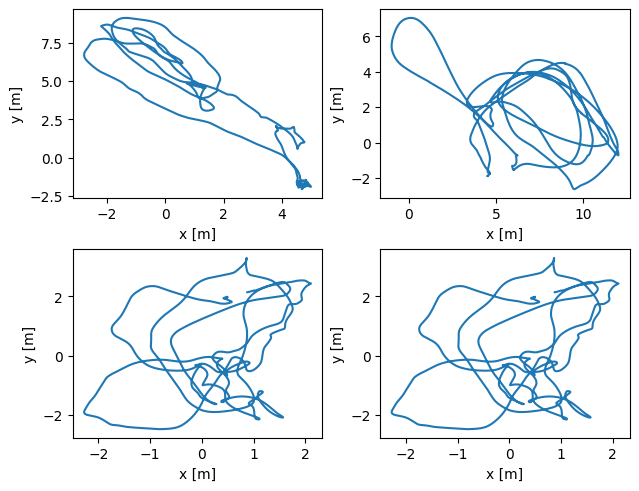

In [29]:
x1 = mh_01_data[" p_RS_R_x [m]"]
y1 = mh_01_data[" p_RS_R_y [m]"]
z1 = mh_01_data[" p_RS_R_z [m]"]

x2 = mh_03_data[" p_RS_R_x [m]"]
y2 = mh_03_data[" p_RS_R_y [m]"]
z2 = mh_03_data[" p_RS_R_z [m]"]

x3 = v1_01_data[" p_RS_R_x [m]"]
y3 = v1_01_data[" p_RS_R_y [m]"]
z3 = v1_01_data[" p_RS_R_z [m]"]

x4 = v1_02_data[" p_RS_R_x [m]"]
y4 = v1_02_data[" p_RS_R_y [m]"]
z4 = v1_02_data[" p_RS_R_z [m]"]
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots( ncols=2, nrows=2, layout='constrained',)

ax1.plot(x1, y1)
ax1.set_xlabel("x [m]")
ax1.set_ylabel("y [m]")

ax2.plot(x2, y2)
ax2.set_xlabel("x [m]")
ax2.set_ylabel("y [m]")

ax3.plot(x3, y3)
ax3.set_xlabel("x [m]")
ax3.set_ylabel("y [m]")

ax4.plot(x3, y3)
ax4.set_xlabel("x [m]")
ax4.set_ylabel("y [m]")



In [23]:
x = mh_01_data[" p_RS_R_x [m]"]
y = mh_01_data[" p_RS_R_y [m]"]
z = mh_01_data[" p_RS_R_z [m]"]

x = mh_03_data[" p_RS_R_x [m]"]
y = mh_03_data[" p_RS_R_y [m]"]
z = mh_03_data[" p_RS_R_z [m]"]

x = v1_01_data[" p_RS_R_x [m]"]
y = v1_01_data[" p_RS_R_y [m]"]
z = v1_01_data[" p_RS_R_z [m]"]

# x = v1_02_data[" p_RS_R_x [m]"]
# y = v1_02_data[" p_RS_R_y [m]"]
# z = v1_02_data[" p_RS_R_z [m]"]

x0 = 0
y0 = 0
z0 = 0
distance, dis_x, dis_y, dis_z = 0, 0, 0, 0

for data in range(len(x)): 
    x1 = x[data]
    y1 = y[data]
    z1 = z[data]

    dis_x = dis_x + np.sqrt((x1-x0)**2) 
    dis_y = dis_y + np.sqrt((y1-y0)**2) 
    dis_z = dis_z + np.sqrt((z1-z0)**2) 
    distance = distance + np.sqrt((x1-x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
    x0 = x1 
    y0 = y1 
    z0 = z1

print(dis_x)
print(dis_y)
print(dis_z)
print(distance)


31.362100000000133
41.65285599999997
14.381029999999939
61.09361802621455
